In [7]:
import gymnasium as gym
from scripts.DQN_Optimizer import DQN_Optimizer

In [8]:
env = gym.make("CartPole-v1")

In [9]:
param_dict = {
                "batch_size" : 128,
                "gamma" : 0.99,
                "eps_start" : 1,
                "eps_end" : 0.1,
                "decay_steps" : 900,
                "tau" : 0.005,
                "learning_rate" : 1e-4,
                }

dqn_opt = DQN_Optimizer(env = env, replay_memory_size= 1000, param_dict=param_dict,num_episodes=1000)

The specified number of episodes might be big for optimization on cpu


In [10]:
dqn_opt.set_optimizer("adam")

In [11]:
dqn_opt.run_optimization()

Current episode: 100%|██████████| 1000/1000 [06:53<00:00,  2.42it/s]

Optimization complete


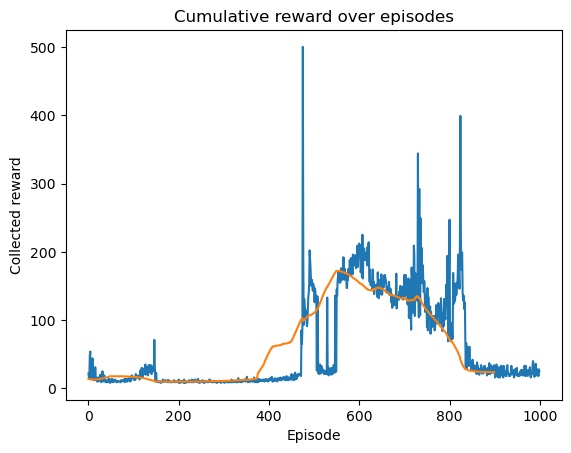

In [12]:
dqn_opt.plot_rewards(moving_avg_width=100)